In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # numpy arrays / linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # map plot
import warnings
warnings.filterwarnings('ignore') 

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from scipy.optimize import curve_fit # predictive modeling
import seaborn as sns
import statsmodels.api as sm

import datetime
from datetime import date

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv', index_col='date', parse_dates=True, engine='python', header=0)
df = df[df['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['total_vaccinations_per_hundred']
df.dropna(inplace=True)
df = df.reset_index()
df.head()

,date,total_vaccinations_per_hundred
0,2020-12-15,0.10
1,2020-12-31,0.31
2,2021-01-09,0.63
3,2021-01-13,0.69
4,2021-01-20,1.04


In [4]:
df=df.rename(columns={'date':'ds', 'total_vaccinations_per_hundred':'y'})
df.head()

,ds,y
0,2020-12-15,0.10
1,2020-12-31,0.31
2,2021-01-09,0.63
3,2021-01-13,0.69
4,2021-01-20,1.04


In [5]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
77,2022-12-31
78,2023-01-31
79,2023-02-28
80,2023-03-31
81,2023-04-30


In [7]:
forecast = model.predict(future)

In [8]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
77,2022-12-31,298.658834,172.706744,421.571579,172.641357,421.389887,0.103293,0.103293,0.103293,0.103293,0.103293,0.103293,0.0,0.0,0.0,298.762127
78,2023-01-31,312.920569,177.699541,444.896672,177.934824,444.784592,-0.045519,-0.045519,-0.045519,-0.045519,-0.045519,-0.045519,0.0,0.0,0.0,312.875050
79,2023-02-28,325.802136,182.410484,465.859639,182.566886,465.953829,-0.045519,-0.045519,-0.045519,-0.045519,-0.045519,-0.045519,0.0,0.0,0.0,325.756617
80,2023-03-31,340.063871,181.471238,489.288434,181.331134,489.017897,0.161005,0.161005,0.161005,0.161005,0.161005,0.161005,0.0,0.0,0.0,340.224877
81,2023-04-30,353.865551,183.143717,514.425663,183.054529,514.297641,-0.060212,-0.060212,-0.060212,-0.060212,-0.060212,-0.060212,0.0,0.0,0.0,353.805339


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
77,2022-12-31,298.762127,172.706744,421.571579
78,2023-01-31,312.875050,177.699541,444.896672
79,2023-02-28,325.756617,182.410484,465.859639
80,2023-03-31,340.224877,181.471238,489.288434
81,2023-04-30,353.805339,183.143717,514.425663


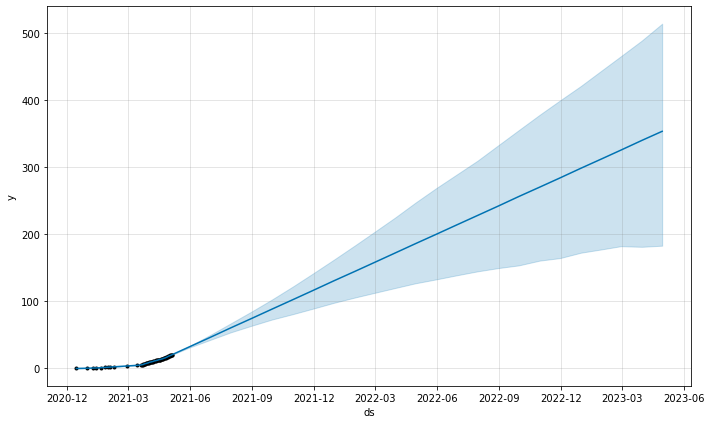

In [10]:
model.plot(forecast);

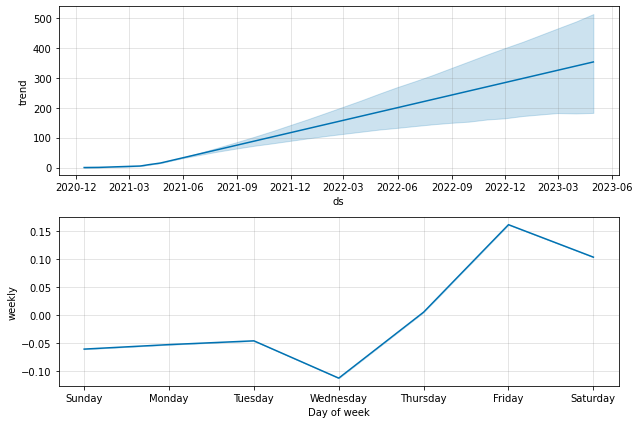

In [11]:
model.plot_components(forecast);

In [12]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [13]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
53,2021-05-02,18.884592,19.13
54,2021-05-03,19.352637,19.45
55,2021-05-04,19.819396,19.77
56,2021-05-05,20.213149,20.12
57,2021-05-06,20.790505,20.69


In [14]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.9995741639879729

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

0.014092244312221001

In [16]:
metric_df.yhat.mean()

10.353103822725057

In [17]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(metric_df.y, metric_df.yhat))

0.09582621145924435


In [18]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(metric_df.y, metric_df.yhat))

0.08662537895983446


In [19]:
from math import sqrt
rmse = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(rmse)

0.11871075904155023
